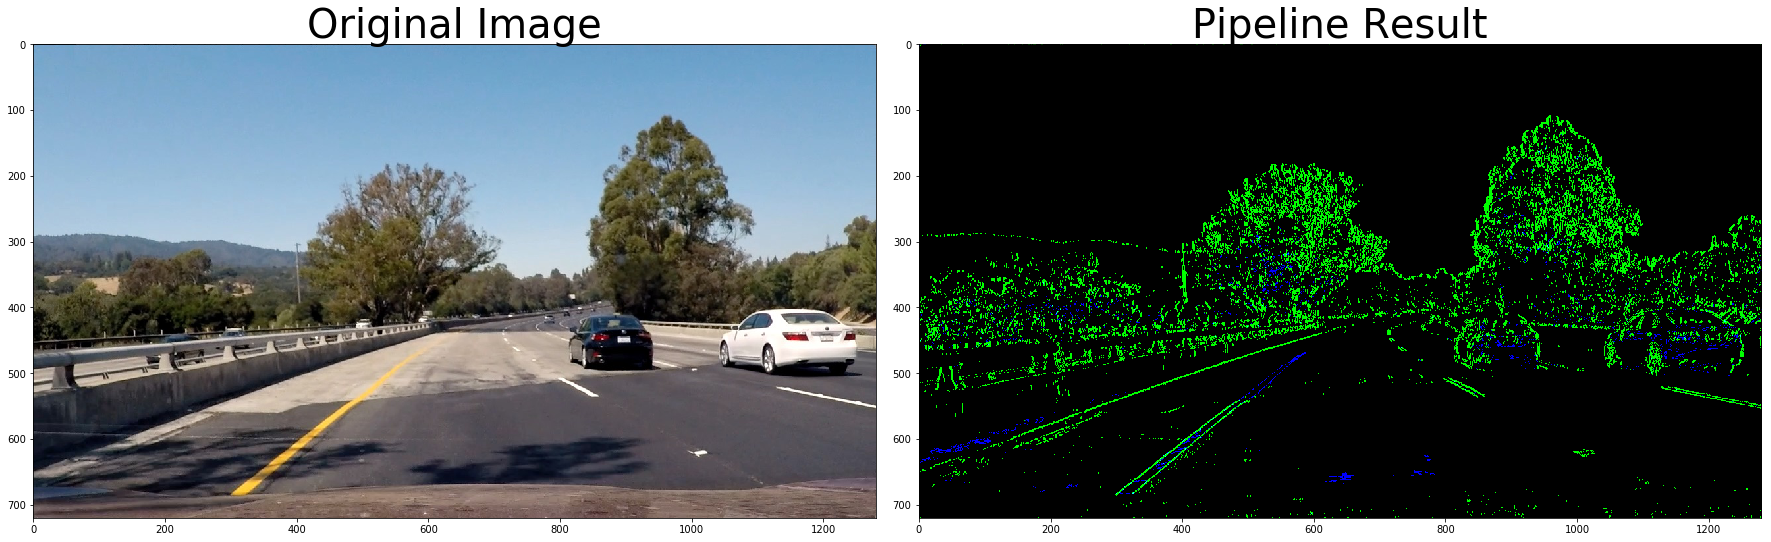

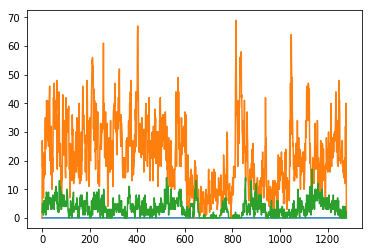

In [4]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
image = mpimg.imread('bridge_shadow.jpg') 

# Edit this function to create your own pipeline. 
def get_binary_image(img, s_thresh=(170, 200), sx_thresh=(20, 100)): #s_thresh = 170, 200 and sx_thresh = 20,100
    #img = np.copy(img) 
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float) 
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1] 
    s_channel = hls[:,:,2] 
    
    # Sobel x 
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x 
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal 
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx)) 
    
    # Threshold x gradient 
    sxbinary = np.zeros_like(scaled_sobel) 
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1 
    # Threshold color channel 
    s_binary = np.zeros_like(s_channel) 
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1 

    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might 
    # be beneficial to replace this channel with something else. 
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) 
    return color_binary 

def get_histogram_peaks(img):
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    return histogram

binary_image = get_binary_image(image) #find lane lines
peakPixels = get_histogram_peaks(result) #find peaks

# Plot the result 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9)) 
f.tight_layout() 
ax1.imshow(image) 
ax1.set_title('Original Image', fontsize=40) 
ax2.imshow(binary_image) 
ax2.set_title('Pipeline Result', fontsize=40) 
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

plt.plot(peakPixels)
plt.show()
